In [1]:
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import time
import yfinance as yf
import mplfinance as mpl

In [2]:
df = pd.read_csv("tatamotors.csv")

In [3]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2020-12-07 09:15:00+05:30,184.449997,186.449997,183.050003,185.350006,185.350006,0
1,2020-12-07 10:15:00+05:30,185.199997,185.550003,184.399994,184.949997,184.949997,6042838
2,2020-12-07 11:15:00+05:30,185.199997,185.300003,184.050003,184.699997,184.699997,3673533
3,2020-12-07 12:15:00+05:30,184.500000,185.300003,184.350006,184.699997,184.699997,4050294
4,2020-12-07 13:15:00+05:30,184.649994,184.899994,182.699997,183.000000,183.000000,6972677


In [4]:
df.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
1436,2021-10-05 14:15:00+05:30,347.950012,348.000000,345.000000,345.049988,345.049988,3082221
1437,2021-10-05 15:15:00+05:30,345.049988,345.149994,344.350006,345.000000,345.000000,1656542
1438,2021-10-06 09:15:00+05:30,347.000000,348.700012,339.000000,340.899994,340.899994,7268293
1439,2021-10-06 10:15:00+05:30,340.899994,341.750000,339.149994,341.500000,341.500000,1107938
1440,2021-10-06 10:29:40+05:30,341.600006,341.600006,341.600006,341.600006,341.600006,0


In [5]:
df= df[["Close"]].copy()

In [6]:
df

,Close
0,185.350006
1,184.949997
2,184.699997
3,184.699997
4,183.000000
...,...
1436,345.049988
1437,345.000000
1438,340.899994
1439,341.500000


In [7]:
df.describe()

,Close
count,1441.000000
mean,294.918147
std,46.661673
min,159.100006
25%,291.600006
50%,305.899994
75%,323.149994
max,359.000000


In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
result =adfuller(df.Close.dropna())
print(f"ADF statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF statistic: -2.274994302459852
p-value: 0.18015966241676162


In [10]:
result

(-2.274994302459852,
 0.18015966241676162,
 5,
 1435,
 {'1%': -3.4349151819757466,
  '5%': -2.863556216004778,
  '10%': -2.5678434198545568},
 7058.88824617226)

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

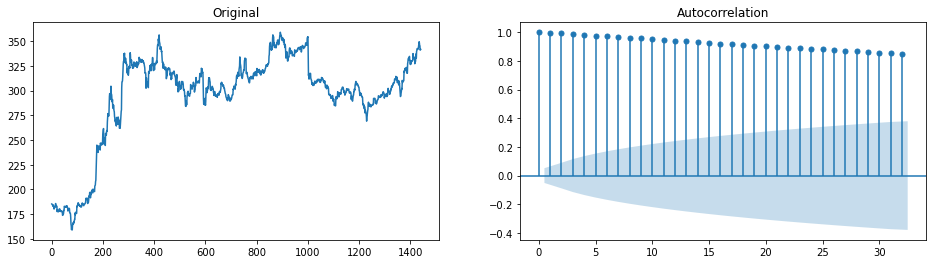

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(df.Close)
ax1.set_title('Original')
plot_acf(df.Close, ax=ax2);

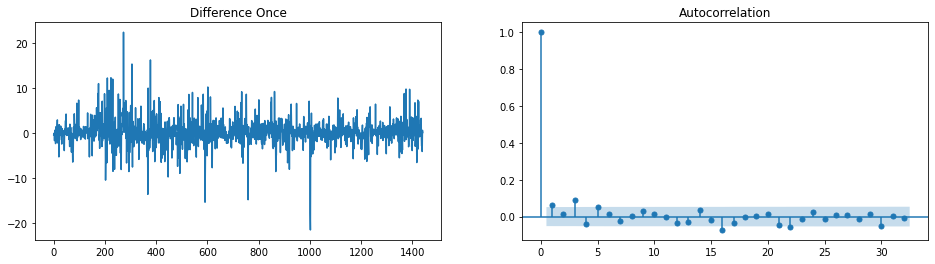

In [13]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
plot_acf(diff, ax=ax2);


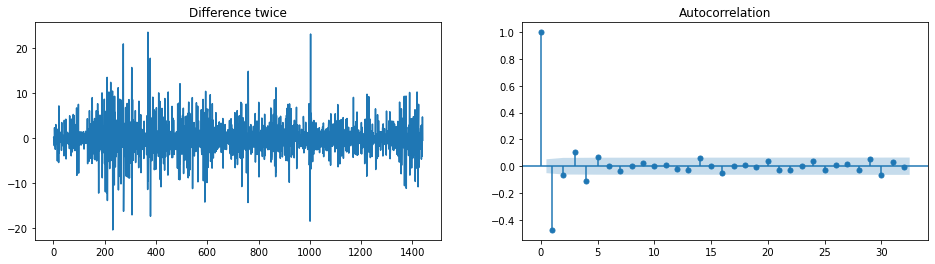

In [14]:
diff = df.Close.diff().diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2);


In [15]:
from pmdarima.arima.utils import ndiffs

ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
ndiffs(df.Close, test="adf")

1 is the value of d.

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
diff = df.Close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_pacf(diff, ax=ax2);


from above right side graph we can see 5th line have highest height. so p value is 5

In [ ]:
diff = df.Close.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference Once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);

13 can be suitable for the q value becuse of havinig medium height in graph.

p, q, d = 5, 13, 1

Fitting in arima model


In [ ]:
df = df.Close.astype('float32')
best_score, best_cfg = float("inf"), None
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            try:
                mse = evaluate_arima_model(dataset, order)
                if mse < best_score:
                    best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
            except:
                continue

print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(df.Close, order=(5,2,1))
result = model.fit(disp=1)

In [ ]:
print(result.summary())

In [ ]:
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density= True)

In [ ]:
result.plot_predict(
    start=-1,
    end=60,
    dynamic=False,
);

TypeError: Expect data.index as DatetimeIndex